# COVID-19 Data Analysis

In [19]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from datetime import datetime


In [20]:
# Load the data
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [21]:
# Check the shape of the data, i.e. number of rows and columns
df.shape


(51120, 8)

In [22]:
# Check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [23]:
# Check the missing values in the data
df.isnull().sum()

Date_reported            0
Country_code           213
Country                  0
WHO_region            3834
New_cases            14422
Cumulative_cases         0
New_deaths           26871
Cumulative_deaths        0
dtype: int64

In [24]:
# handle missing values by filling them with 0 as it is safe to assume that if there are no new cases or deaths, then the value is 0 and then at the beginning of 2020, there were no cases or deaths
df.fillna({'New_cases': 0, 'New_deaths': 0}, inplace=True)
df.isnull().sum()

Date_reported           0
Country_code          213
Country                 0
WHO_region           3834
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [25]:
# Mapping for the provided territories to WHO regions to make the data consistent and easy to understand
territory_to_region = {
    'Holy See': 'EURO',
    'Isle of Man': 'EURO', 
    'French Guiana': 'AMRO', # French Guiana is an overseas region of France
    'Gibraltar': 'EURO', # Gibraltar is a British Overseas Territory
    'Guadeloupe': 'AMRO', # Guadeloupe is an overseas region of France
    'Guernsey': 'EURO', # Guernsey and Jersey are two Crown dependencies of the United Kingdom
    'Martinique': 'AMRO', # Martinique is an overseas region of France
    'Jersey': 'EURO',
    'Falkland Islands (Malvinas)': 'AMRO', # Falkland Islands is a British Overseas Territory
    'Faroe Islands': 'EURO',
    'Saint Martin': 'AMRO', # Saint Martin is an overseas collectivity of France
    'Liechtenstein': 'EURO',
    'Mayotte': 'AFRO',
    'Réunion': 'AFRO',
    'Saint Helena': 'AFRO',
    'Saint Pierre and Miquelon': 'AMRO',
    'Saint Barthélemy': 'AMRO',
    'Pitcairn': 'WPRO'
}

# Apply the mapping to the dataframe by creating a new column called WHO_region and lambda function to map the territories to the WHO regions
df['WHO_region'] = df.apply(
    lambda row: territory_to_region.get(row['Country'], row['WHO_region']),
    axis=1
)

df.isnull().sum()

Date_reported          0
Country_code         213
Country                0
WHO_region           213
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [26]:
# convert the date column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      51120 non-null  datetime64[ns]
 1   Country_code       50907 non-null  object        
 2   Country            51120 non-null  object        
 3   WHO_region         50907 non-null  object        
 4   New_cases          51120 non-null  float64       
 5   Cumulative_cases   51120 non-null  int64         
 6   New_deaths         51120 non-null  float64       
 7   Cumulative_deaths  51120 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [27]:
# drop the column 'Country_code' as it is not required for the analysis
df.drop('Country_code', axis=1, inplace=True)
df.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,Afghanistan,EMRO,0.0,0,0.0,0
1,2020-01-12,Afghanistan,EMRO,0.0,0,0.0,0
2,2020-01-19,Afghanistan,EMRO,0.0,0,0.0,0
3,2020-01-26,Afghanistan,EMRO,0.0,0,0.0,0
4,2020-02-02,Afghanistan,EMRO,0.0,0,0.0,0


# Exploratory Data Analysis

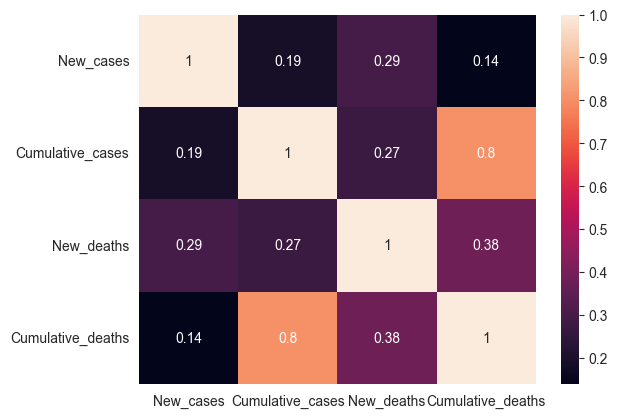

In [43]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

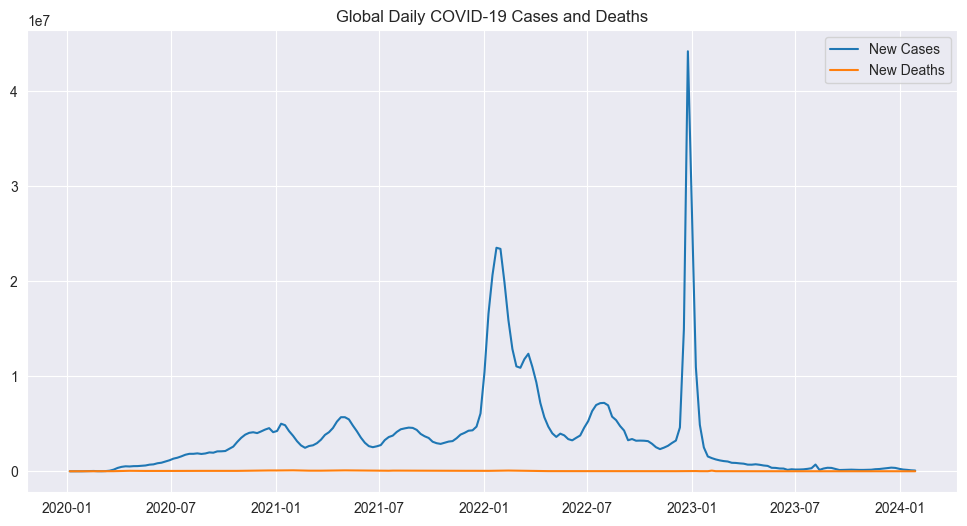

In [28]:
# check the global trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Date_reported')['New_cases'].sum(), label='New Cases')
plt.plot(df.groupby('Date_reported')['New_deaths'].sum(), label='New Deaths')
plt.title('Global Daily COVID-19 Cases and Deaths')
plt.legend()
plt.show()

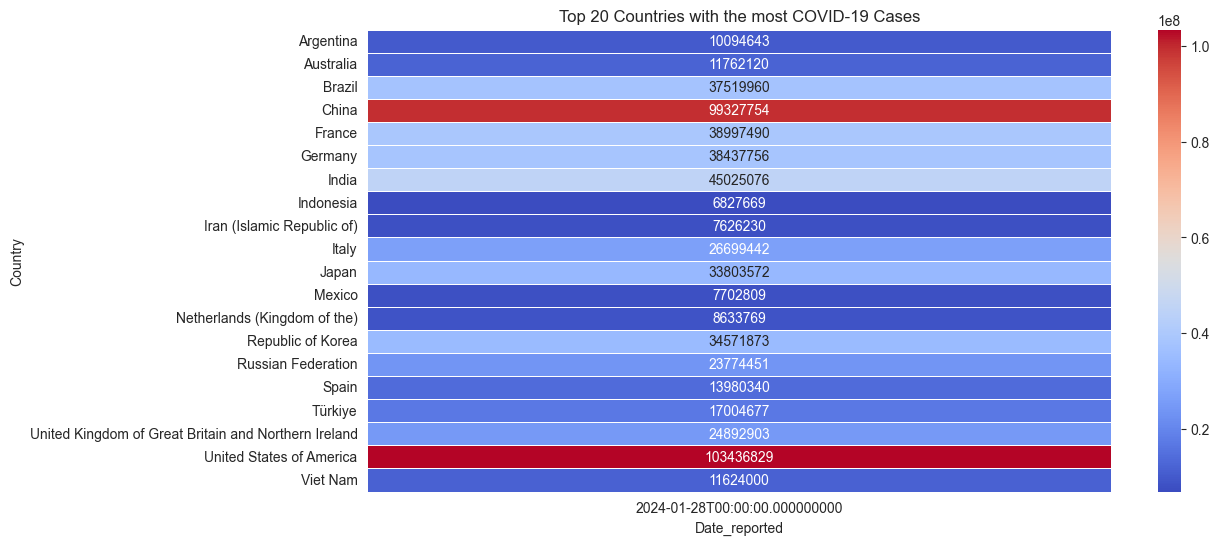

In [36]:
# Heatmap of countries with the most cases
top_countries = df[df['Date_reported'] == df['Date_reported'].max()].sort_values(by='Cumulative_cases', ascending=False).head(20)

# Create a pivot table
pivot_table = top_countries.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Top 20 Countries with the most COVID-19 Cases')
plt.show()